# Customer Sales Data Analysis

## 1. Introduction
This report analyzes customer sales data with a focus on data cleaning and exploratory data analysis.

## 2. Dataset Overview
The dataset contains numerical and categorical features, missing values, duplicates, and outliers.

In [1]:

import pandas as pd
import numpy as np

# Load the cleaned dataset
df = pd.read_csv("C:/Users/Meet/Downloads/cleaned_customer_sales_data.csv")

# Display the first few rows
df.head()
    

,Customer_ID,Age,Gender,Product_Category,Purchase_Amount,Discount_Applied,Payment_Method
0,1,56.0,Male,Groceries,47.94,0,Debit Card
1,2,69.0,Female,Furniture,891.69,10,Cash
2,3,46.0,Female,Clothing,530.06,10,Credit Card
3,4,32.0,Female,Groceries,993.00,20,Cash
4,5,60.0,Male,Toys,78.43,0,Debit Card


## 3. Data Cleaning
Steps performed: handling missing values, removing duplicates, treating outliers, and standardizing categorical values.

In [4]:

# Check for missing values
df.isnull().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Treat outliers using IQR
Q1 = df["Purchase_Amount"].quantile(0.25)
Q3 = df["Purchase_Amount"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["Purchase_Amount"] = np.where(
    (df["Purchase_Amount"] < lower_bound) | (df["Purchase_Amount"] > upper_bound),
    df["Purchase_Amount"].median(),
    df["Purchase_Amount"]
)

df.head()
    

,Customer_ID,Age,Gender,Product_Category,Purchase_Amount,Discount_Applied,Payment_Method
0,1,56.0,Male,Groceries,47.94,0,Debit Card
1,2,69.0,Female,Furniture,891.69,10,Cash
2,3,46.0,Female,Clothing,530.06,10,Credit Card
3,4,32.0,Female,Groceries,993.00,20,Cash
4,5,60.0,Male,Toys,78.43,0,Debit Card


## 4. Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       201 non-null    int64  
 1   Age               201 non-null    float64
 2   Gender            201 non-null    object 
 3   Product_Category  201 non-null    object 
 4   Purchase_Amount   201 non-null    float64
 5   Discount_Applied  201 non-null    int64  
 6   Payment_Method    201 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 11.1+ KB
       Customer_ID         Age  Purchase_Amount  Discount_Applied
count   201.000000  201.000000       201.000000        201.000000
mean    100.019900   43.527363       493.349254          9.875622
std      58.134152   14.633882       281.012031          7.114032
min       1.000000   18.000000        24.970000          0.000000
25%      50.000000   31.000000       251.110000          5.000000
50%     100.00

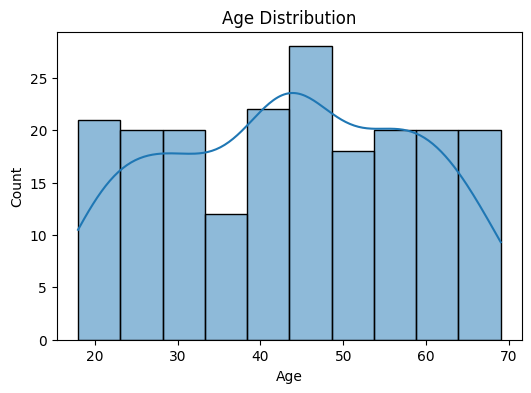

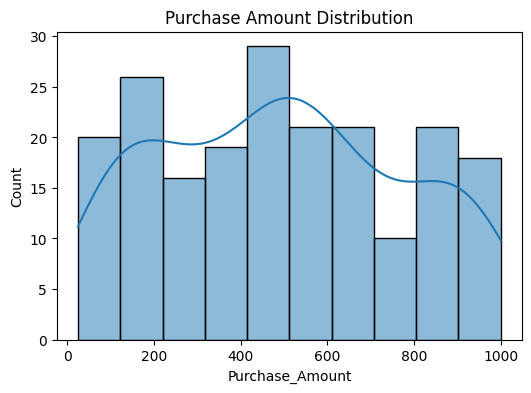

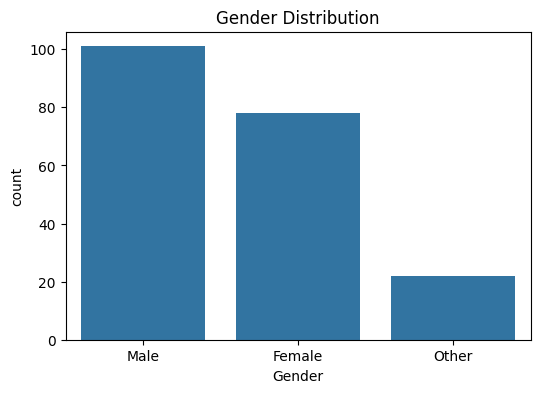

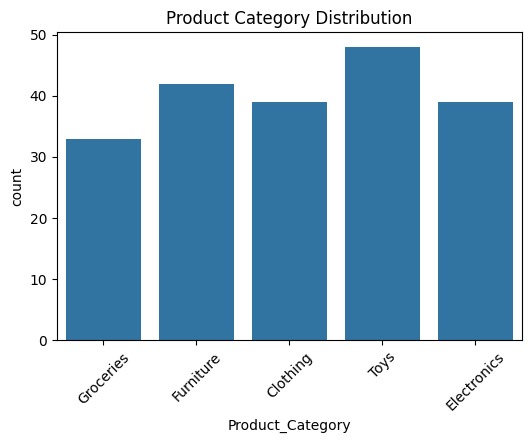

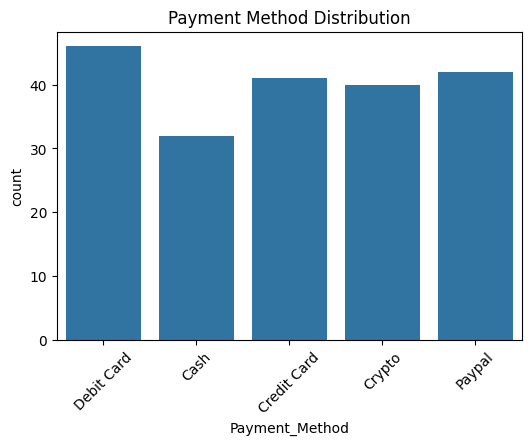

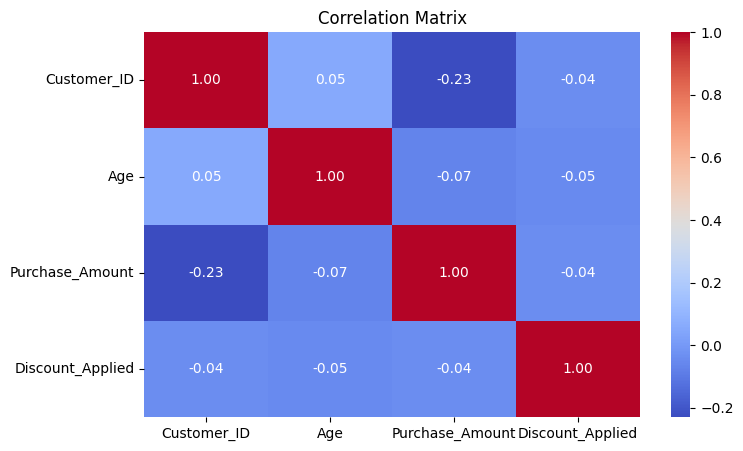

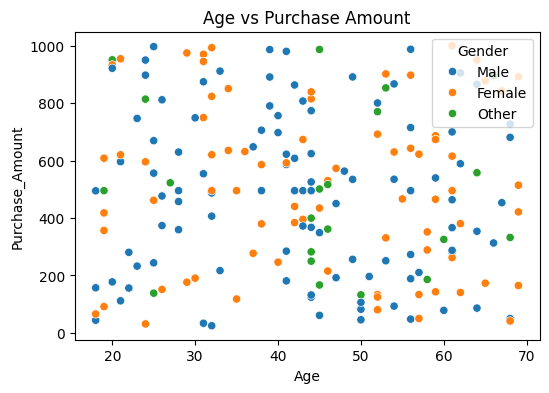

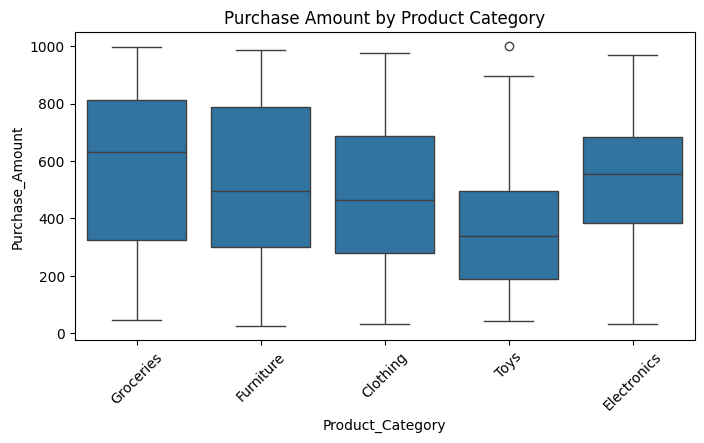

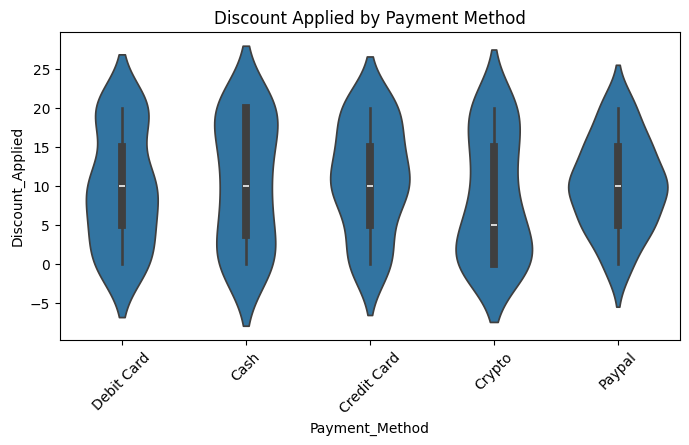

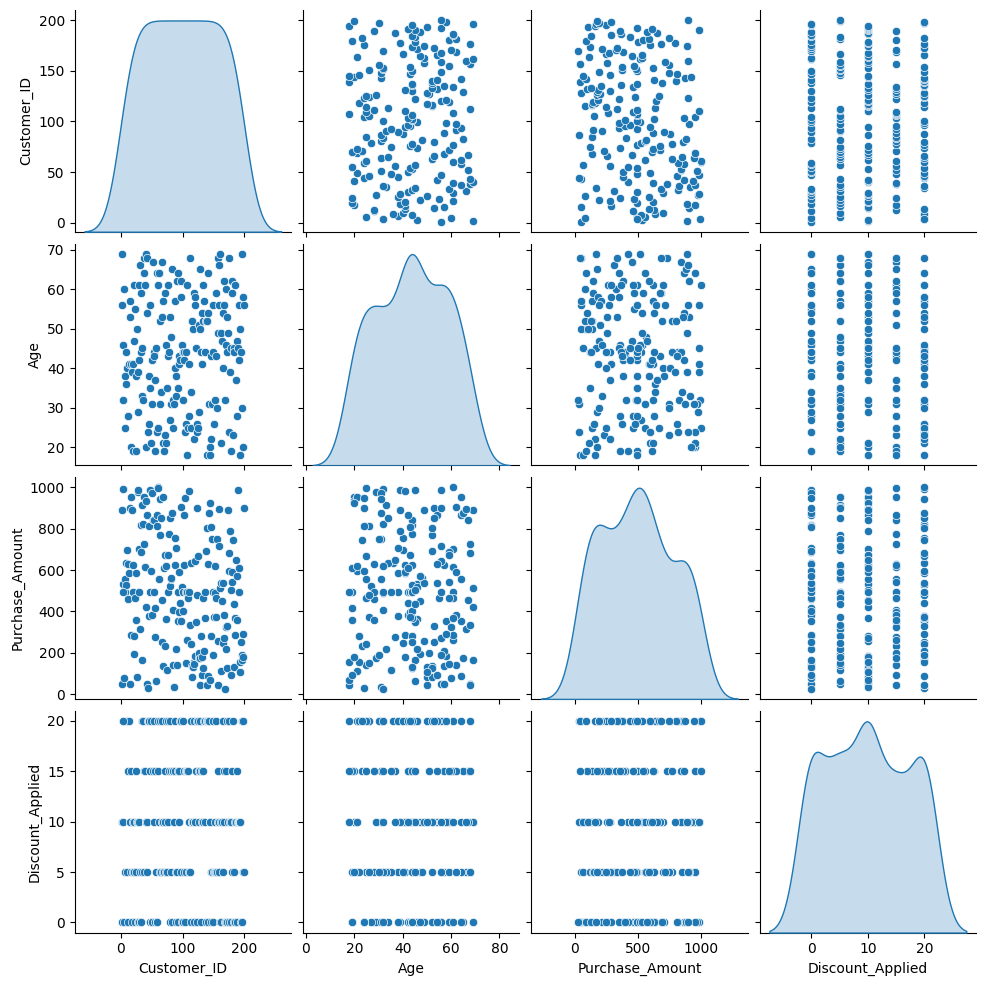

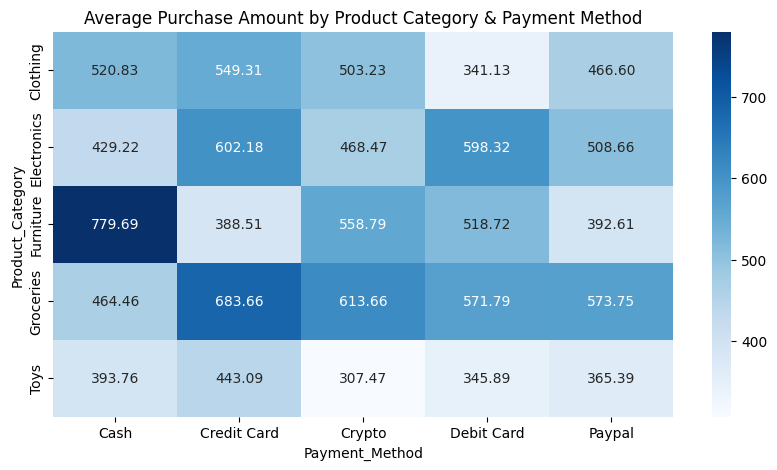

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("cleaned_customer_sales_data.csv")

# Display the first few rows and dataset info
df.head(), df.info()

# ---------------------------------------------
# 1. Univariate Analysis
# ---------------------------------------------

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Histograms for numerical variables
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["Purchase_Amount"], bins=10, kde=True)
plt.title("Purchase Amount Distribution")
plt.show()

# Frequency distribution for categorical variables
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Gender"])
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=df["Product_Category"])
plt.xticks(rotation=45)
plt.title("Product Category Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=df["Payment_Method"])
plt.xticks(rotation=45)
plt.title("Payment Method Distribution")
plt.show()

# ---------------------------------------------
# 2. Bivariate Analysis
# ---------------------------------------------

# Correlation Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Scatter plot: Age vs Purchase Amount
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Age"], y=df["Purchase_Amount"], hue=df["Gender"])
plt.title("Age vs Purchase Amount")
plt.show()

# Box plot: Purchase Amount by Product Category
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Product_Category"], y=df["Purchase_Amount"])
plt.xticks(rotation=45)
plt.title("Purchase Amount by Product Category")
plt.show()

# Violin plot: Discount Applied by Payment Method
plt.figure(figsize=(8, 4))
sns.violinplot(x=df["Payment_Method"], y=df["Discount_Applied"])
plt.xticks(rotation=45)
plt.title("Discount Applied by Payment Method")
plt.show()

# ---------------------------------------------
# 3. Multivariate Analysis
# ---------------------------------------------

# Pairplot to analyze multiple relationships
sns.pairplot(df.select_dtypes(include=["number"]), diag_kind="kde")
plt.show()

# Heatmap for category-wise average purchase amount
pivot_table = df.pivot_table(values="Purchase_Amount", index="Product_Category", columns="Payment_Method", aggfunc="mean")

plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt=".2f")
plt.title("Average Purchase Amount by Product Category & Payment Method")
plt.show()

    

## 5. Insights and Observations
- Electronics and Furniture have higher purchase amounts.
- Credit and Debit Cards are the most common payment methods.

## 6. Conclusion
The dataset is now cleaned and ready for further analysis or modeling.